<a href="https://colab.research.google.com/github/Devheun/Data-Analysis/blob/main/Data_update(Lec5).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h2>데이터 수정하기</h2>


> pandas의 df.rename()을 이용해 변수명 변경

<h3>데이터 프레임 만들기</h3>

---



In [2]:
import pandas as pd
df_raw=pd.DataFrame({'var1':[1,2,1],
                     'var2':[2,3,2]})
df_raw

,var1,var2
0,1,2
1,2,3
2,1,2


<h3>데이터 프레임 복사본 만들기</h3>

---



In [3]:
df_new=df_raw.copy()
df_new

,var1,var2
0,1,2
1,2,3
2,1,2


<h3>변수명 바꾸기</h3>

---



In [4]:
df_new=df_new.rename(columns={'var2':'v2'})
df_new

,var1,v2
0,1,2
1,2,3
2,1,2




> 파생변수 만들기(기존의 변수 변형)



In [5]:
df=pd.DataFrame({'var1':[4,3,8],
                 'var2':[2,6,1]})
df['var_sum']=df['var1']+df['var2']
df

,var1,var2,var_sum
0,4,2,6
1,3,6,9
2,8,1,9


 **Practice** : mpg 통합 연비 변수 만들기 (도시 연비와 고속도로 연비를 통합하는 연비)

In [8]:
mpg=pd.read_csv('mpg.csv')
mpg['total']=(mpg['cty']+mpg['hwy'])/2
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,total
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0


**Practice** : 고연비 합격판정 받은 자동차 대수 몇대인지 확인 (조건문으로 파생변수 만들기)

<기준값 정하기 (평균과 mean 값 확인)>

---



In [12]:
mpg['total'].describe()


count    234.000000
mean      20.149573
std        5.050290
min       10.500000
25%       15.500000
50%       20.500000
75%       23.500000
max       39.500000
Name: total, dtype: float64

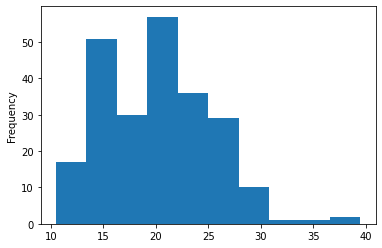

In [13]:
mpg['total'].plot.hist()

위의 요약통계량과 히스토그램을 보면 mean과 median이 20 정도이고,
total 연비가 20-22.5 사이인 자동차 모델이 많으므로, 연비가 20이 넘을 때 합격 판정.

<합격 판정 변수 만들기>

---



In [15]:
import numpy as np
mpg['test']=np.where(mpg['total']>=20,'pass','fail')

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,total,test
229,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize,23.5,pass
230,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize,25.0,pass
231,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize,21.0,pass
232,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize,22.0,pass
233,volkswagen,passat,3.6,2008,6,auto(s6),f,17,26,p,midsize,21.5,pass


<빈도표로 합격 판정 자동차 수 살펴보기>

---



In [16]:
mpg['test'].value_counts()

pass    128
fail    106
Name: test, dtype: int64

<막대 그래프로 빈도 표현하기>

---



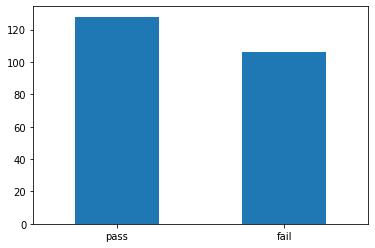

In [18]:
count_test=mpg['test'].value_counts()
count_test.plot.bar(rot=0) # rot=0을 이용해 축 이름 수평만들기

**Practice** : 연비 A,B,C 세 등급으로 분류해보기 (중첩 조건문 활용)

In [19]:
mpg['grade']=np.where(mpg['total']>=30,'A',np.where(mpg['total']>=20,'B','C'))
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,total,test,grade
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5,pass,B
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0,pass,B
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5,pass,B
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5,pass,B
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0,pass,B


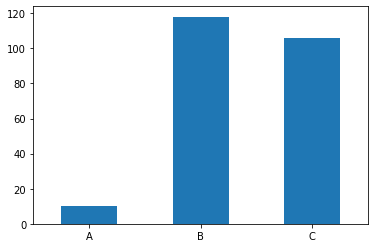

In [22]:
count_grade=mpg['grade'].value_counts().sort_index()
count_grade.plot.bar(rot=0)


**To do Analysis** : *midwest.csv* 데이터를 이용해 분석문제 해결해보기
1. midwest.csv를 불러와 데이터의 특징 파악하기

2. poptotal(전체인구) 변수를 total로, popasian(아시안 인구) 변수를 asian으로 
수정하기

3. total,asian 변수를 이용해 '전체 인구 대비 아시아 인구 백분율' 파생벼수를 추가하고, 히스토그램으로 분포 살펴보기

4. 아시아 인구 백분율 평균 구하고, 평균을 초과하면 'large', 그 외에는 'small'을 부여한 파생변수 만들기

5. 'large'와 'small'에 해당하는 지역이 얼마나 많은지 빈도표와 빈도 막대 그래프를 만들어 확인하기

In [24]:
# Problem 1
midwest=pd.read_csv('midwest.csv')
midwest.head() #mpg.tail(), mpg.describe(), mpg.shape, mpg.info(),...

,PID,county,state,area,poptotal,popdensity,popwhite,popblack,popamerindian,popasian,...,percollege,percprof,poppovertyknown,percpovertyknown,percbelowpoverty,percchildbelowpovert,percadultpoverty,percelderlypoverty,inmetro,category
0,561,ADAMS,IL,0.052,66090,1270.961540,63917,1702,98,249,...,19.631392,4.355859,63628,96.274777,13.151443,18.011717,11.009776,12.443812,0,AAR
1,562,ALEXANDER,IL,0.014,10626,759.000000,7054,3496,19,48,...,11.243308,2.870315,10529,99.087145,32.244278,45.826514,27.385647,25.228976,0,LHR
2,563,BOND,IL,0.022,14991,681.409091,14477,429,35,16,...,17.033819,4.488572,14235,94.956974,12.068844,14.036061,10.852090,12.697410,0,AAR
3,564,BOONE,IL,0.017,30806,1812.117650,29344,127,46,150,...,17.278954,4.197800,30337,98.477569,7.209019,11.179536,5.536013,6.217047,1,ALU
4,565,BROWN,IL,0.018,5836,324.222222,5264,547,14,5,...,14.475999,3.367680,4815,82.505140,13.520249,13.022889,11.143211,19.200000,0,AAR


In [25]:
# Problem 2
midwest=midwest.rename(columns={'poptotal':'total'})
midwest=midwest.rename(columns={'popasian':'asian'})
midwest.head()

,PID,county,state,area,total,popdensity,popwhite,popblack,popamerindian,asian,...,percollege,percprof,poppovertyknown,percpovertyknown,percbelowpoverty,percchildbelowpovert,percadultpoverty,percelderlypoverty,inmetro,category
0,561,ADAMS,IL,0.052,66090,1270.961540,63917,1702,98,249,...,19.631392,4.355859,63628,96.274777,13.151443,18.011717,11.009776,12.443812,0,AAR
1,562,ALEXANDER,IL,0.014,10626,759.000000,7054,3496,19,48,...,11.243308,2.870315,10529,99.087145,32.244278,45.826514,27.385647,25.228976,0,LHR
2,563,BOND,IL,0.022,14991,681.409091,14477,429,35,16,...,17.033819,4.488572,14235,94.956974,12.068844,14.036061,10.852090,12.697410,0,AAR
3,564,BOONE,IL,0.017,30806,1812.117650,29344,127,46,150,...,17.278954,4.197800,30337,98.477569,7.209019,11.179536,5.536013,6.217047,1,ALU
4,565,BROWN,IL,0.018,5836,324.222222,5264,547,14,5,...,14.475999,3.367680,4815,82.505140,13.520249,13.022889,11.143211,19.200000,0,AAR


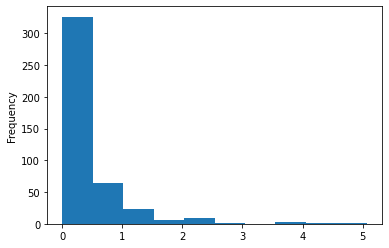

In [26]:
# Problem 3
midwest['ratio']=(midwest['asian']/midwest['total'])*100
midwest['ratio'].plot.hist()

In [28]:
# Problem 4
midwest['group']=np.where(midwest['ratio']>midwest['ratio'].mean(),'large','small')

In [32]:
# Problem 5
count_group=midwest['group'].value_counts()
count_group

small    318
large    119
Name: group, dtype: int64

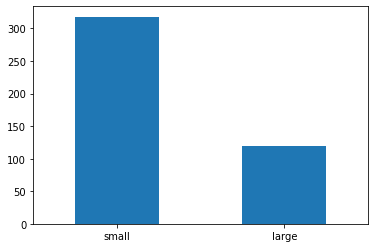

In [33]:
count_group.plot.bar(rot=0)